In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the CSV file
file_path = 'Users/allenyang/Downloads/stem/merged.csv'
df = pd.read_csv(file_path)

In [6]:
# Display the first few rows of the dataset
print(df.head())

# Inspect the structure of the dataset
print(df.info())

# Summary statistics
df.describe(include='all')

               category                                        subcategory  \
0  CONSUMER_ELECTRONICS  All Other Health and Personal Care Stores - 44...   
1  CONSUMER_ELECTRONICS  All Other Health and Personal Care Stores - 44...   
2  CONSUMER_ELECTRONICS  All Other Health and Personal Care Stores - 44...   
3  CONSUMER_ELECTRONICS  All Other Health and Personal Care Stores - 44...   
4  CONSUMER_ELECTRONICS  All Other Health and Personal Care Stores - 44...   

   merchant_id  actual_repayment_pct  predicted_repayment_pct  num_trxn  \
0        78100              0.661686                 0.812984        11   
1        83738              0.964568                 0.967203         6   
2        12368              0.893519                 0.947609       161   
3        14754              0.870808                 0.943917       142   
4        25557              0.963223                 0.950356       105   

   avg_auth_amt  avg_loan_amt  avg_fico  avg_term   avg_apr  
0    232.121764   

,category,subcategory,merchant_id,actual_repayment_pct,predicted_repayment_pct,num_trxn,avg_auth_amt,avg_loan_amt,avg_fico,avg_term,avg_apr
count,138,138,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
unique,9,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CONSUMER_ELECTRONICS,Jewelry Stores - 448310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,43,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,51262.891304,0.919824,0.938698,124.550725,1134.720229,1059.543149,660.347826,9.188406,0.232348
std,NaN,NaN,24778.573655,0.149751,0.043417,644.098998,1155.266527,1032.076224,33.561286,1.850432,0.065723
min,NaN,NaN,11801.000000,0.000000,0.707895,1.000000,79.840000,79.840000,560.000000,3.000000,0.000000
25%,NaN,NaN,28873.250000,0.885033,0.934501,3.000000,407.883776,398.497792,640.750000,8.000000,0.233146
50%,NaN,NaN,49763.500000,0.974099,0.950069,8.000000,837.672362,805.585346,659.500000,9.000000,0.250000
75%,NaN,NaN,71566.250000,1.000000,0.963027,33.000000,1450.691250,1327.375694,678.750000,10.000000,0.261601


In [ ]:
#avg_loan_amt/avg_auth_amt 
#avg_loan_repayment = avg_loan_amt * (1 + avg_apr)
#outperform_rate = actual_repayment_pct - predicted_ repayment_pct
#actual_loan_recieved = avg_loan_repayment * actual_repayment_pct

In [9]:
# Check for missing values
print(df.isnull().sum())

category                   0
subcategory                0
merchant_id                0
actual_repayment_pct       0
predicted_repayment_pct    0
num_trxn                   0
avg_auth_amt               0
avg_loan_amt               0
avg_fico                   0
avg_term                   0
avg_apr                    0
dtype: int64


In [ ]:
# so no value missing so far

In [10]:
# Use the copy() function to make a copy of the DataFrame
df_test = df.copy()

In [12]:
# Drop columns 'merchant_id'
df_test = df_test.drop(['merchant_id'], axis=1)

In [13]:
# Obtain descriptive statistics by category using groupby()
df_test.groupby('category').describe()

actual_repayment_pct                                \
                                    count      mean       std       min   
category                                                                  
AUTO_PARTS                            6.0  0.876089  0.113247  0.705134   
BEAUTY                                1.0  0.775577       NaN  0.775577   
CONSUMER_ELECTRONICS                 43.0  0.867415  0.228952  0.000000   
HOME_FURNISHINGS                     22.0  0.985607  0.030642  0.874031   
JEWELRY                              27.0  0.957846  0.061272  0.799825   
MENS_FASHION                          1.0  1.000000       NaN  1.000000   
OTHER                                23.0  0.907404  0.122336  0.500000   
PERSONAL_SERVICE                      3.0  0.939001  0.068856  0.864338   
WOMENS_FASHION                       12.0  0.947693  0.064285  0.822480   

                                                              \
                           25%       50%       75%       max   
category                                                       
AUTO_PARTS            0.825847  0.866453  0.971249  1.000000   
BEAUTY                0.775577  0.775577  0.775577  0.775577   
CONSUMER_ELECTRONICS  0.876832  0.948596  1.000000  1.000000   
HOME_FURNISHINGS      0.987849  1.000000  1.000000  1.000000   
JEWELRY               0.932244  1.000000  1.000000  1.000000   
MENS_FASHION          1.000000  1.000000  1.000000  1.000000   
OTHER                 0.859635  0.944777  1.000000  1.000000   
PERSONAL_SERVICE      0.908501  0.952664  0.976332  1.000000   
WOMENS_FASHION        0.916051  0.974127  1.000000  1.000000   

                     predicted_repayment_pct            ... avg_term        \
                                       count      mean  ...      75%   max   
category                                                ...                  
AUTO_PARTS                               6.0  0.940365  ...     10.0  11.0   
BEAUTY                                   1.0  0.915180  ...      8.0   8.0   
CONSUMER_ELECTRONICS                    43.0  0.927768  ...     10.0  11.0   
HOME_FURNISHINGS                        22.0  0.959518  ...     11.5  12.0   
JEWELRY                                 27.0  0.927270  ...     10.0  12.0   
MENS_FASHION                             1.0  0.954044  ...      8.0   8.0   
OTHER                                   23.0  0.946575  ...     10.5  12.0   
PERSONAL_SERVICE                         3.0  0.954307  ...     10.5  12.0   
WOMENS_FASHION                          12.0  0.946252  ...     10.0  12.0   

                     avg_apr                                          \
                       count      mean       std       min       25%   
category                                                               
AUTO_PARTS               6.0  0.259748  0.007500  0.249971  0.257438   
BEAUTY                   1.0  0.262635       NaN  0.262635  0.262635   
CONSUMER_ELECTRONICS    43.0  0.237868  0.052551  0.000000  0.231388   
HOME_FURNISHINGS        22.0  0.190461  0.109259  0.000000  0.098327   
JEWELRY                 27.0  0.235559  0.045145  0.055000  0.236757   
MENS_FASHION             1.0  0.068299       NaN  0.068299  0.068299   
OTHER                   23.0  0.239120  0.059630  0.008769  0.225994   
PERSONAL_SERVICE         3.0  0.266525  0.028991  0.249591  0.249788   
WOMENS_FASHION          12.0  0.258065  0.025060  0.214657  0.242870   

                                                    
                           50%       75%       max  
category                                            
AUTO_PARTS            0.258385  0.260916  0.272863  
BEAUTY                0.262635  0.262635  0.262635  
CONSUMER_ELECTRONICS  0.250000  0.263095  0.300000  
HOME_FURNISHINGS      0.247048  0.250278  0.300000  
JEWELRY               0.250000  0.258413  0.273365  
MENS_FASHION          0.068299  0.068299  0.068299  
OTHER                 0.250000  0.276319  0.288888  
PERSONAL_SERVICE   

In [14]:
# Design the key metric "repayment_rate"
df_test['repayment_rate'] = df_test['actual_repayment_pct'] / df_test['predicted_repayment_pct']


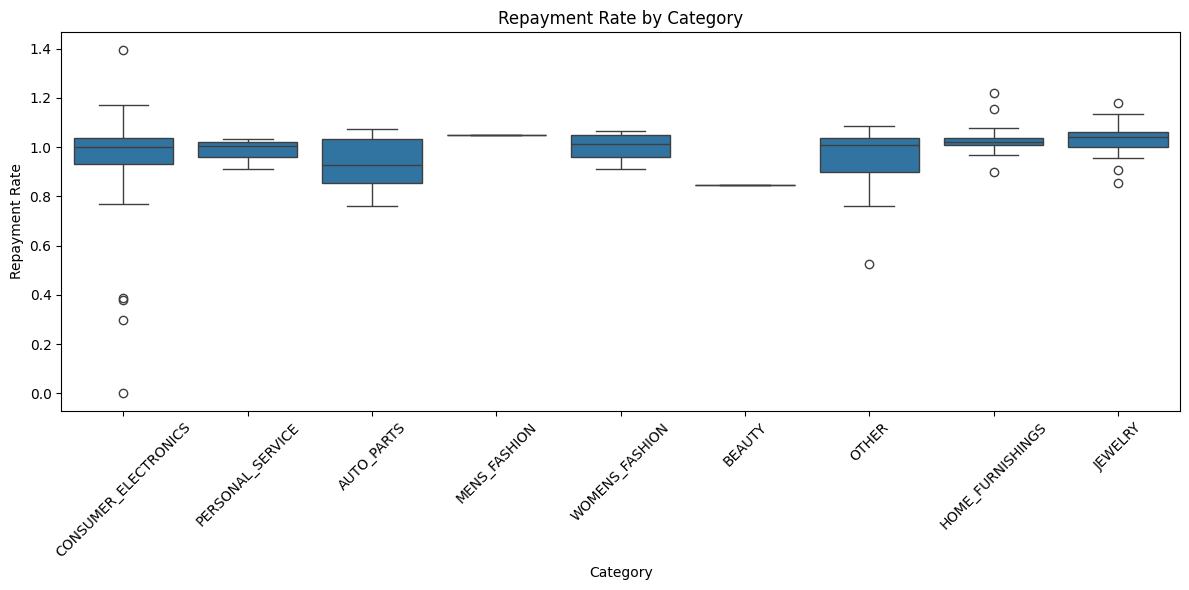

In [15]:

# Plot the result grouped by category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_test, x='category', y='repayment_rate')
plt.title('Repayment Rate by Category')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.ylabel('Repayment Rate')
plt.tight_layout()
plt.show()

In [18]:
# Filter categories with count greater than 3
category_counts = df_test['category'].value_counts()
categories_gt_3 = category_counts[category_counts > 3].index

# Filter the dataframe to include only these categories
df_filtered = df_test[df_test['category'].isin(categories_gt_3)]

# Calculate the mean repayment rate for these categories
mean_repayment_rate = df_filtered.groupby('category')['repayment_rate'].mean().sort_values(ascending=False)

# Find the top 2 categories
top_2_categories = mean_repayment_rate.head(2)

top_2_categories


category
JEWELRY             1.033688
HOME_FURNISHINGS    1.029376
Name: repayment_rate, dtype: float64

In [16]:
from scipy.stats import pearsonr
# Calculate the correlation between avg_fico and repayment_rate
correlation, p_value = pearsonr(df_test['avg_fico'], df_test['repayment_rate'])

correlation, p_value

(0.18831399260314116, 0.026973917851304114)

In [ ]:
#It is statistically significant that the strength of the correlation is weak.